In [1]:
import numpy as np 
import pandas as pd 

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

# 1. Cleaning Data 

In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , inplace=True)

In [7]:
spam.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
spam.rename(columns={'v1':'target','v2': 'text'},inplace=True)

In [9]:
spam.head(10)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
spam['target']=encoder.fit_transform(spam['target'])

In [12]:
spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
spam.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
spam.duplicated().sum()

403

In [15]:
spam=spam.drop_duplicates(keep='first')

In [16]:
spam.duplicated().sum()

0

In [17]:
spam.shape

(5169, 2)

# 2. EDA

In [18]:
# check for spam values 
spam['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

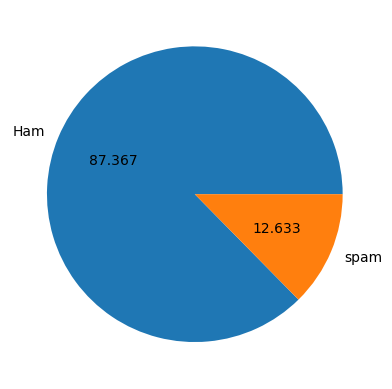

In [20]:
plt.pie(spam['target'].value_counts(),labels =['Ham','spam'],autopct='%.3f')
plt.show

data is imbalanced 

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [23]:
spam['char_num']=spam['text'].apply(len)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_185672\453037933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['char_num']=spam['text'].apply(len)


In [24]:
spam.head()

,target,text,char_num
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
spam['word_num']=spam['text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_185672\1683372190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['word_num']=spam['text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [26]:
spam.head()

,target,text,char_num,word_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
spam['sentence_num']=spam['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_185672\4182948328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['sentence_num']=spam['text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [28]:
spam.head()

,target,text,char_num,word_num,sentence_num
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
spam[['char_num','word_num','sentence_num']].describe()

,char_num,word_num,sentence_num
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
spam[spam['target']==1][['char_num','word_num','sentence_num']].describe()

,char_num,word_num,sentence_num
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
spam[spam['target']==0][['char_num','word_num','sentence_num']].describe()

,char_num,word_num,sentence_num
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
import seaborn as sns

<Axes: xlabel='char_num', ylabel='Count'>

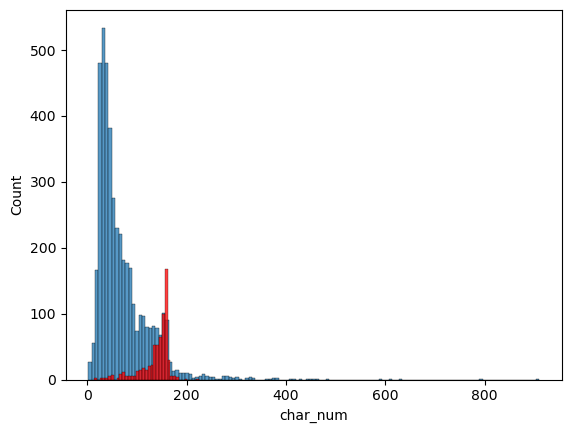

In [33]:
sns.histplot(spam[spam['target']==0]['char_num'])
sns.histplot(spam[spam['target']==1]['char_num'],color='red')

<Axes: xlabel='word_num', ylabel='Count'>

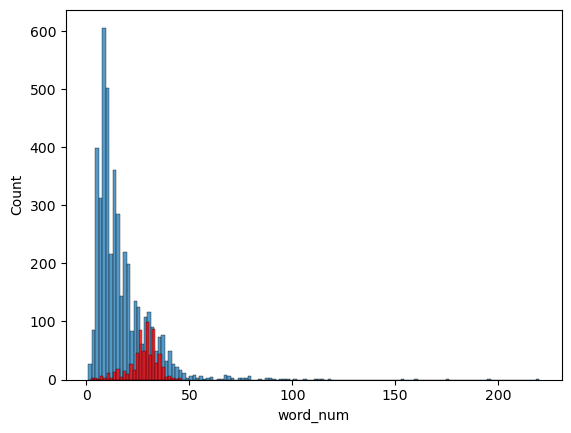

In [34]:
sns.histplot(spam[spam['target']==0]['word_num'])
sns.histplot(spam[spam['target']==1]['word_num'],color='red')

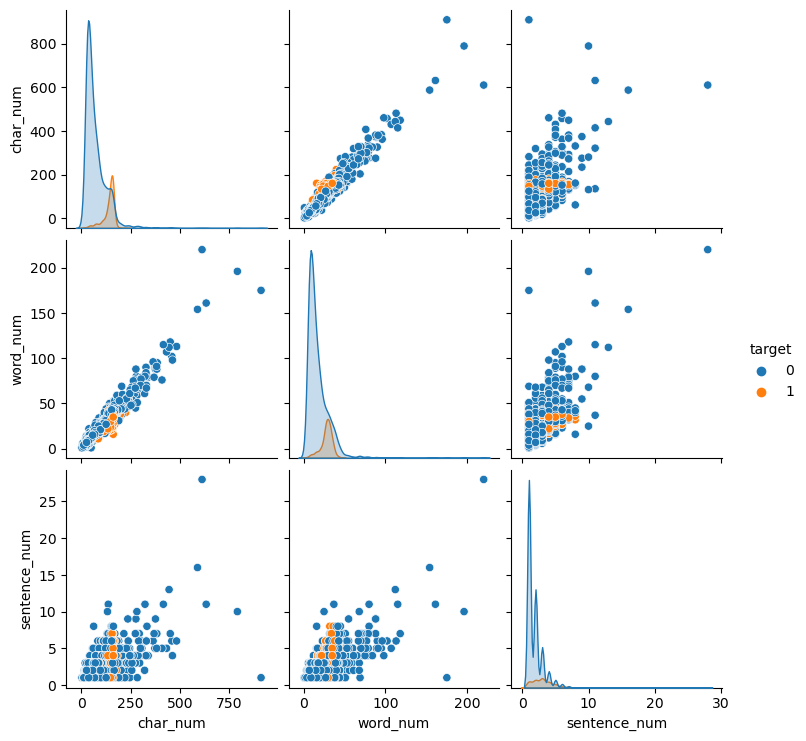

In [35]:
sns.pairplot(spam,hue='target')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_185672\1311123908.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam.corr(),annot=True)


<Axes: >

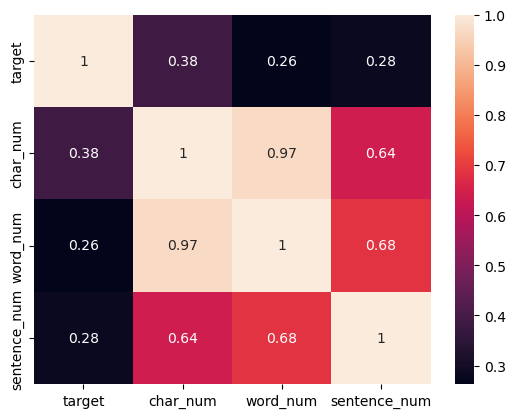

In [36]:
sns.heatmap(spam.corr(),annot=True)

# 3. Preprocessing (Data)

    - Lower case 

    - Tokenization 

    - Removing special characters

    - Removing stop word and punctuations

    - Stemming

In [49]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    lst=[]
    for i in text:
        if i.isalnum():
            lst.append(i)
            
    text=lst[:]
    lst.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            lst.append(i)
     
    text=lst[:]
    lst.clear()
    for i in text:
        lst.append(stem.stem(i))
            
    return " ".join(lst)

In [44]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
transform_text(spam['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
stem=PorterStemmer()
stem.stem('dancing')

'danc'

In [51]:
spam['Transformed']=spam['text'].apply(transform_text)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_185672\852052318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['Transformed']=spam['text'].apply(transform_text)


In [52]:
spam.head()

,target,text,char_num,word_num,sentence_num,Transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
pip install wordcloud


     ------------------------------------ 152.1/152.1 kB 567.4 kB/s eta 0:00:00


In [54]:
spam.head()

,target,text,char_num,word_num,sentence_num,Transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus=[]

for msg in spam[spam['target']==1]['Transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter

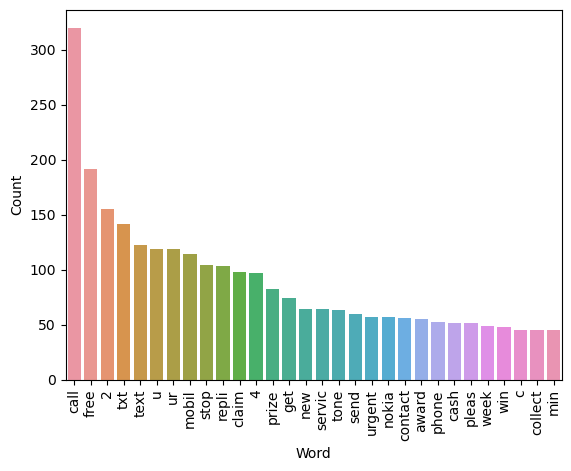

In [60]:
counter_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Use the DataFrame columns for x and y in the barplot
sns.barplot(x='Word', y='Count', data=counter_df)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
ham_corpus=[]

for msg in spam[spam['target']==0]['Transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [62]:
len(ham_corpus)

35394

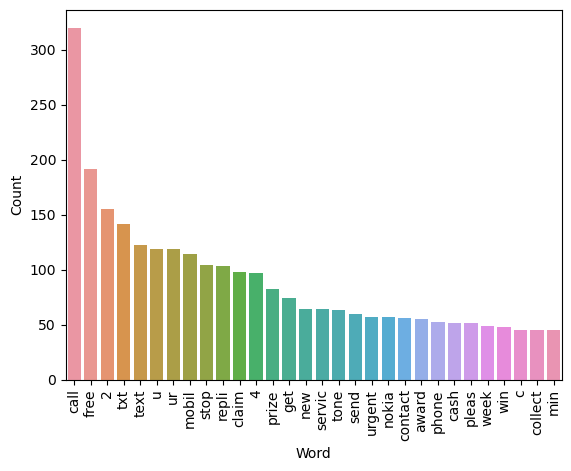

In [64]:
counter_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Use the DataFrame columns for x and y in the barplot
sns.barplot(x=counter_df.iloc[:, 0], y=counter_df.iloc[:, 1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [66]:
X=tfidf.fit_transform(spam['Transformed']).toarray()

In [67]:
X.shape

(5169, 6708)

In [68]:
Y=spam['target'].values

In [69]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_text,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score 

In [73]:
gnb=GaussianNB() 
mnb=MultinomialNB()
bnb=BernoulliNB()

In [74]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [75]:
pred=gnb.predict(X_text)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(precision_score(Y_test,pred))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [76]:
mnb.fit(X_train,Y_train)
pred=mnb.predict(X_text)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(precision_score(Y_test,pred))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [78]:
bnb.fit(X_train,Y_train)
pred=bnb.predict(X_text)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(precision_score(Y_test,pred))
pd.DataFrame(pred)



0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


,0
0,0
1,0
2,0
3,0
4,1
...,...
1029,0
1030,0
1031,0
1032,0


In [79]:
pd.DataFrame(Y_test)

,0
0,0
1,0
2,0
3,0
4,1
...,...
1029,0
1030,0
1031,0
1032,0


Outcome :

We'll be using nmb vectorized on tfidf 

In [80]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))